#CS231n Python Tutorial With Google Colab

บทเรียนนี้ถูกเขียนขึ้นในตอนแรกโดย [Justin Johnson](https://web.eecs.umich.edu/~justincj/) สำหรับวิชา cs231n  
และได้รับการดัดแปลงให้อยู่ในรูปแบบ Jupyter notebook สำหรับวิชา cs228 โดย  
[Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) และ [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335)

เวอร์ชันนี้ได้รับการปรับให้ใช้งานบน Colab โดย Kevin Zakka  
สำหรับภาคฤดูใบไม้ผลิ ปี 2020 ของวิชา [cs231n](https://cs231n.github.io/)  
โดยใช้ Python 3 เป็นค่าปริยายในการรันโค้ด


##Introduction

Python เป็นภาษาการเขียนโปรแกรมเอนกประสงค์ที่ยอดเยี่ยมในตัวมันเอง  
แต่เมื่อรวมกับไลบรารียอดนิยมบางตัว เช่น `numpy`, `scipy`, `matplotlib`  
มันจะกลายเป็นสภาพแวดล้อมอันทรงพลังสำหรับการคำนวณทางวิทยาศาสตร์

เราคาดว่าผู้เรียนหลายท่านจะมีประสบการณ์กับ Python และ numpy อยู่แล้ว  
สำหรับท่านที่ยังใหม่ เนื้อหาส่วนนี้จะเป็นบทสรุปเร่งรัด  
ทั้งในแง่พื้นฐานของภาษา Python และการใช้งาน Python ในงานด้านวิทยาการข้อมูลและคำนวณเชิงวิทยาศาสตร์

บางท่านอาจมีพื้นฐานจาก Matlab มาก่อน  
ในกรณีนี้เราขอแนะนำให้ดูหน้า **numpy for Matlab users** ด้วย  
<https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html>


ในบทเรียนนี้ เราจะเรียนรู้เกี่ยวกับหัวข้อหลัก ๆ ดังนี้:

* **Python พื้นฐาน**: ชนิดข้อมูลพื้นฐาน (Container, List, Dictionary, Set, Tuple), ฟังก์ชัน (Functions), คลาส (Classes)
* **Numpy**: การใช้งานอาเรย์ (Array), การเข้าถึงสมาชิกในอาเรย์ (Indexing), ชนิดข้อมูล, การคำนวณกับอาเรย์, การแพร่กระจายค่า (Broadcasting)
* **Matplotlib**: การสร้างกราฟ, การจัดรูปแบบ subplot, การแสดงภาพ (Images)
* **IPython**: การสร้างโน้ตบุ๊ก, กระบวนการทำงานทั่วไปในเชิงโต้ตอบ


## 🐍 หมายเหตุสั้น ๆ เกี่ยวกับเวอร์ชันของ Python

ตั้งแต่วันที่ 1 มกราคม 2020 เป็นต้นมา  
Python ได้ [ยุติการสนับสนุนอย่างเป็นทางการ](https://www.python.org/doc/sunset-python-2/) สำหรับ `python2`

สำหรับบทเรียนนี้ เราจะใช้ **Python 3.7**  
และสามารถตรวจสอบเวอร์ชันของ Python ในเครื่องของคุณได้โดยรันคำสั่งนี้ใน command line:

```bash
python --version
```

ใน Google Colab เราสามารถกำหนดเวอร์ชัน Python โดยไปที่เมนู  
`Runtime -> Change Runtime Type` แล้วเลือก `python3`

หมายเหตุ: ณ เดือนเมษายน 2020  
Colab ใช้ **Python 3.6.9** ซึ่งสามารถรันบทเรียนนี้ได้โดยไม่มีปัญหาใด ๆ


In [ ]:
!python --version

Python 3.11.13


##Basics of Python

Python เป็นภาษาการเขียนโปรแกรมระดับสูง มีการกำหนดชนิดข้อมูลแบบไดนามิก และรองรับหลายแนวทางการเขียนโปรแกรม (multiparadigm) โค้ดของ Python มักถูกกล่าวว่า 'เกือบเหมือนกับ pseudocode' เพราะสามารถแสดงแนวคิดที่ทรงพลังได้ในโค้ดเพียงไม่กี่บรรทัด และยังอ่านเข้าใจง่ายอีกด้วย ตัวอย่างเช่น ด้านล่างนี้เป็นการเขียนอัลกอริธึม quicksort แบบคลาสสิกด้วยภาษา Python:

In [ ]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


###Basic data types (ชนิดข้อมูลพื้นฐาน)

####Numbers

จำนวนเต็ม (integers) และจำนวนทศนิยม (floats) ทำงานได้เหมือนภาษาอื่น ๆ:

หมายถึงพฤติกรรมพื้นฐานของตัวเลขในภาษา Python นั้น สอดคล้องกับภาษาโปรแกรมอื่น เช่น C++, Java หรือ JavaScript โดยทั่วไป เช่น

การบวก (+), ลบ (-), คูณ (*), ยกกำลัง (**), หรือหาร (/) ทำงานตามปกติ

สามารถนำตัวแปรเหล่านี้มาใช้งานหรือดำเนินการทางคณิตศาสตร์ได้ตรงไปตรงมา

In [ ]:
x = 3
print(x, type(x))

3 <class 'int'>


In [ ]:
print(x + 1)   # Addition
print(x - 1)   # Subtraction
print(x * 2)   # Multiplication
print(x ** 2)  # Exponentiation

4
2
6
9


In [ ]:
x += 1  # x = x + 1
print(x)
x *= 2  # x = x * 2
print(x)

4
8


In [ ]:
y = 2.5
print(type(y))
print(y, y + 1, y * 2, y ** 2)

<class 'float'>
2.5 3.5 5.0 6.25


ต่างจากหลายภาษา Python ไม่มีโอเปอเรเตอร์เพิ่มค่าหรือลดค่าทีละหนึ่งในรูปแบบย่อ เช่น x++ หรือ x--

นั่นหมายความว่าใน Python ต้องใช้ x += 1 หรือ x -= 1 แทนการเขียนแบบย่อในภาษาอย่าง C, Java หรือ JavaScript

Python ยังมีชนิดข้อมูลในตัวสำหรับ "จำนวนเต็มขนาดใหญ่" (long integers) และ "จำนวนเชิงซ้อน" (complex numbers) สามารถดูรายละเอียดทั้งหมดได้ในเอกสารประกอบภาษา Python [documentation](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-long-complex).

####Booleans

Python มีโอเปอเรเตอร์สำหรับตรรกะบูลีน (Boolean logic) ครบถ้วนตามที่พบในภาษาโปรแกรมทั่วไป แต่ใช้ “คำภาษาอังกฤษ” แทน “สัญลักษณ์” อย่าง &&, || เป็นต้น

In [ ]:
t, f = True, False
print(type(t))

<class 'bool'>


ทดลอง:

In [ ]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


####Strings

In [ ]:
hello = 'สวัสดีครับทุกคน'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter
print(hello, len(hello))

สวัสดีครับทุกคน 15


In [ ]:
hw = hello + ' ' + world  # String concatenation
print(hw)

สวัสดีครับทุกคน world


In [ ]:
hw12 = 'ยินดีต้อนรับทุกคนเข้าสู่ห้องเรียนไพธอน {} {} {}'.format(hello, world, 12)  # string formatting
print(hw12)

ยินดีต้อนรับทุกคนเข้าสู่ห้องเรียนไพธอน สวัสดีครับทุกคน world 12


สตริง (String) ใน Python มีเมทอดที่มีประโยชน์มากมาย:

In [ ]:
s = "hello"
print(s.capitalize())         # ทำให้ตัวอักษรตัวแรกเป็นตัวใหญ่ → "Hello"
print(s.upper())              # แปลงสตริงให้เป็นตัวพิมพ์ใหญ่ทั้งหมด → "HELLO"
print(s.rjust(7))             # จัดข้อความชิดขวา โดยเพิ่มช่องว่างด้านหน้าให้ครบ 7 ตัวอักษร → "  hello"
print(s.center(7))            # จัดข้อความให้อยู่ตรงกลาง โดยเว้นช่องว่างด้านซ้าย-ขวา → " hello "
print(s.replace('l', '(ell)'))# แทนที่ทุกตัว 'l' ด้วย "(ell)" → "he(ell)(ell)o"
print('  world '.strip())     # ลบช่องว่างทั้งด้านซ้ายและขวาของสตริง → "world"


Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


คุณสามารถดูรายการเมทอดทั้งหมดของชนิดข้อมูลสตริง (string) ได้ใน  [เอกสารประกอบ](https://docs.python.org/3.7/library/stdtypes.html#string-methods).

###Containers

ภาษา Python มีชนิดข้อมูลคอนเทนเนอร์ (container types) ในตัวหลายแบบ ได้แก่: lists, dictionaries, sets, and tuples.

####Lists

ในภาษา Python list เปรียบเสมือน array ในภาษาอื่น ๆ แต่มีความสามารถเพิ่มเติมที่โดดเด่นคือ:

สามารถปรับขนาดได้ (resizeable): เพิ่ม หรือลบสมาชิกได้ตามต้องการโดยไม่ต้องกำหนดขนาดล่วงหน้า

สามารถเก็บสมาชิกที่มีชนิดข้อมูลต่างกันได้: เช่น ตัวเลข ข้อความ หรือแม้แต่ list ซ้อนภายใน list

In [ ]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [ ]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


In [ ]:
xs.append('bar') # Add a new element to the end of the list
print(xs)

[3, 1, 'foo', 'bar']


In [ ]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs)

bar [3, 1, 'foo']


รายละเอียดเพิมเติม [เอกสารประกอบ](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists).

####Slicing (การเฉือนข้อมูล)

นอกจากจะเข้าถึงสมาชิกใน list ทีละตัวแล้ว Python ยังมีไวยากรณ์สั้นๆ ที่ใช้เพื่อเข้าถึง “ช่วงย่อยของ list” (sublists) ได้ด้วย — เทคนิคนี้เรียกว่า slicing (การเฉือน)

ตัวอย่างการใช้งาน **Slice**

In [ ]:
print(list(range(5)))

[0, 1, 2, 3, 4]


In [ ]:
nums = list(range(5))    # range เป็นฟังก์ชันในตัวที่สร้างลิสต์ของจำนวนเต็ม

print(nums)         # พิมพ์ "[0, 1, 2, 3, 4]"

print(nums[2:4])    # ตัดข้อมูลจากตำแหน่งที่ 2 ถึงก่อน 4 → "[2, 3]"
print(nums[2:])     # ตัดตั้งแต่ตำแหน่งที่ 2 ถึงจบ → "[2, 3, 4]"
print(nums[:2])     # ตัดตั้งแต่เริ่มต้นถึงก่อนตำแหน่ง 2 → "[0, 1]"
print(nums[:])      # ตัดทั้งลิสต์ → "[0, 1, 2, 3, 4]"
print(nums[:-1])    # ใช้อินเด็กซ์ติดลบ: ตัดถึงตัวก่อนสุดท้าย → "[0, 1, 2, 3]"

nums[2:4] = [8, 9] # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


####Loops (การวนซ้ำ)

สามารถเขียนการวนซ้ำได้ดังตัวอย่างนี้:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


หากคุณต้องการเข้าถึง **ดัชนี (index)** ของแต่ละสมาชิกในลูป  
ให้ใช้ฟังก์ชันในตัวของ Python ที่ชื่อว่า `enumerate`:



In [ ]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: cat
#2: dog
#3: monkey


#### การใช้งาน List Comprehensions:

ในงานเขียนโปรแกรม เรามักต้องการแปลงข้อมูลจากรูปแบบหนึ่งไปเป็นอีกรูปแบบหนึ่ง  
ตัวอย่างง่าย ๆ เช่น การหาค่ากำลังสองของตัวเลขในลิสต์:






In [ ]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


**สามารถเขียนโค้ดด้านบนให้สั้นลงโดยใช้ list comprehension:**

In [ ]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


เรายังสามารถเพิ่มเงื่อนไขลงไปใน list comprehension ได้ด้วย เช่น เลือกเฉพาะเลขคู่:

In [ ]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


####Dictionaries (ดิกชันนารี)

ดิกชันนารี (Dictionary) ใน Python ใช้เก็บคู่ของ **(คีย์, ค่า)**  
ลักษณะคล้ายกับ `Map` ในภาษา Java หรือ object ใน Javascript

คุณสามารถใช้งานได้แบบนี้:

In [ ]:
d = {'cat': 'cute', 'dog': 'furry'}  # สร้างดิกชันนารีใหม่พร้อมข้อมูลบางรายการ
print(d['cat'])                      # เข้าถึงค่าจากคีย์ 'cat' → พิมพ์ "cute"
print('cat' in d)                    # ตรวจสอบว่ามีคีย์ 'cat' อยู่ในดิกหรือไม่ → True

cute
True


In [ ]:
d['fish'] = 'wet'    # เพิ่มข้อมูลใหม่ในดิกชันนารี โดยกำหนดว่า key 'fish' มีค่าเป็น 'wet'
print(d['fish'])      # พิมพ์ค่าของ key 'fish' ซึ่งก็คือ "wet"

wet


In [ ]:
print(d['monkey'])  # เกิด KeyError: 'monkey' ไม่ใช่คีย์ที่มีอยู่ในดิกชันนารี d

KeyError: 'monkey'

In [ ]:
print(d.get('monkey', 'ไม่พบข้อมูลคีย์นี้'))  # ดึงค่าจากคีย์ 'monkey' หากไม่มีจะคืนค่าเริ่มต้น "N/A"
print(d.get('fish', 'N/A'))    # ดึงค่าจากคีย์ 'fish' หากมีอยู่จะคืนค่า "wet"

ไม่พบข้อมูลคีย์นี้
wet


In [ ]:
del d['fish']        # ลบสมาชิกที่มีคีย์เป็น 'fish' ออกจากดิกชันนารี
print(d.get('fish', 'N/A')) # 'fish' ไม่มีอยู่ในดิกแล้ว จึงคืนค่าเริ่มต้น "N/A"

N/A


รายละเอียดอื่นๆของ ดิกชันนารี อ่านเพิ่มเติม [เอกสารประกอบ](https://docs.python.org/2/library/stdtypes.html#dict).

การวนลูปผ่านคีย์ในดิกชันนารีสามารถทำได้อย่างง่ายดาย:

In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A {} has {} legs'.format(animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


#### การใช้งาน Dictionary Comprehensions:

รูปแบบนี้คล้ายกับ list comprehensions  
แต่ใช้สำหรับสร้าง **dictionary (พจนานุกรม)**

In [ ]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

#อธิบาย:
#- เราสร้าง dictionary โดยใช้ค่าจากลิสต์ `nums`
#- `x: x ** 2` หมายถึงให้ `x` เป็นคีย์ และ `x²` เป็นค่า
#- เงื่อนไข `if x % 2 == 0` กรองเฉพาะเลขคู่เท่านั้น
#เหมาะสำหรับกรองและแปลงข้อมูลในขั้นตอนเดียวอย่างมีประสิทธิภาพ


{0: 0, 2: 4, 4: 16}


####Sets

ชุดข้อมูล (Set) คือ **กลุ่มของสมาชิกที่ไม่เรียงลำดับ** และ **ไม่มีสมาชิกซ้ำกัน**

ลักษณะสำคัญของ `set`:
- ไม่รับประกันลำดับของข้อมูล
- ไม่สามารถเก็บข้อมูลซ้ำกันได้
- เหมาะสำหรับการตรวจสอบสมาชิก หรือดำเนินการทางเซต เช่น การรวม, ตัดกัน, ต่างกัน

In [ ]:
animals = {'cat', 'dog'}
print('cat' in animals)   # ตรวจสอบว่า 'cat' อยู่ในเซต → True
print('fish' in animals)  # → False


True
False


In [ ]:
animals.add('fish')      # เพิ่มสมาชิก 'fish' เข้าไปในเซต
print('fish' in animals) # ตรวจสอบว่า 'fish' อยู่ในเซตหรือไม่ → True
print(len(animals))      # พิมพ์จำนวนสมาชิกทั้งหมดในเซต

True
3


In [ ]:
animals.add('cat')       # การเพิ่มสมาชิก 'cat' ที่มีอยู่แล้วในเซตจะไม่เกิดผลใด ๆ
print(len(animals))      # พิมพ์จำนวนสมาชิกทั้งหมดในเซต (ไม่มีการเปลี่ยนแปลงจากบรรทัดบน)

animals.remove('cat')    # ลบสมาชิก 'cat' ออกจากเซต
print(len(animals))      # พิมพ์จำนวนสมาชิกในเซตหลังจากลบ (ลดลง 1)

3
2


#### _ลูป_: การวนซ้ำผ่านเซต (Set)

การวนซ้ำสมาชิกในเซตสามารถใช้ไวยากรณ์เดียวกันกับลิสต์ได้
แต่สิ่งสำคัญคือ:  
**เซตเป็นข้อมูลที่ไม่เรียงลำดับ (unordered)**  
ดังนั้นคุณ **ไม่สามารถคาดเดาลำดับของสมาชิก** ที่จะถูกวนซ้ำได้

ผลลัพธ์ของลูปอาจแตกต่างกันไปทุกครั้งที่รัน แม้ข้อมูลจะเหมือนเดิม

In [ ]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: fish
#2: dog
#3: cat


#### Set Comprehensions: การสร้างเซตแบบกระชับ

เช่นเดียวกับ `list` และ `dictionary`  
เราสามารถสร้าง `set` ได้อย่างง่ายดายโดยใช้ **set comprehension**

In [ ]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

{0, 1, 2, 3, 4, 5}


**อธิบาย:**
- วนค่าจาก `x = 0` ถึง `29`
- คำนวณ `sqrt(x)` และแปลงเป็นจำนวนเต็มด้วย `int()`
- ใส่ลงใน `set` ซึ่งจะ **ตัดค่าที่ซ้ำกันอัตโนมัติ**

**เหมาะสำหรับ:**
- สร้างเซตที่กรองค่า
- แปลงค่าทั้งชุดแบบกระชับในบรรทัดเดียว

####Tuples

#### Tuples (ทูเพิล)

**Tuple** คือ ลิสต์ของค่าที่เรียงลำดับแล้ว และ **ไม่สามารถเปลี่ยนแปลงได้** (immutable)  
มีความคล้ายกับ `list` แต่มีข้อแตกต่างสำคัญบางประการ:

- Tuple สามารถใช้เป็น **คีย์ใน dictionary** ได้ (lists ใช้ไม่ได้)
- Tuple สามารถเป็นสมาชิกของ `set` ได้
- เหมาะกับการเก็บข้อมูลที่ไม่ควรเปลี่ยนแปลง เช่น พิกัด, คู่ค่า, ค่าคงที่



❗ หมายเหตุ: การพยายามเปลี่ยนค่าใน tuple จะทำให้เกิดข้อผิดพลาด:

```python
t[0] = 1  # TypeError: 'tuple' object does not support item assignment
```

Tuple จึงเหมาะกับข้อมูลที่ไม่ควรถูกแก้ไขในภายหลัง  
เช่น พิกัดตำแหน่ง `(x, y)`, คู่ค่าคงที่ หรือค่าที่ใช้เป็นดัชนีหลัก


In [ ]:
d = {(x, x + 1): x for x in range(10)}  # สร้าง dictionary โดยใช้ tuple เป็นคีย์ เช่น (0,1), (1,2), ..., (9,10) โดยแต่ละค่าใน dict จะเป็น x
t = (5, 6)       # สร้าง tuple ที่มีค่า (5, 6)
print(type(t))   # แสดงชนิดข้อมูลของตัวแปร t → <class 'tuple'>
print(d[t])      # เข้าถึงค่าจาก dict โดยใช้คีย์เป็น tuple (5,6) → คืนค่า 5
print(d[(1, 2)]) # เข้าถึงค่าจาก dict โดยใช้คีย์เป็น tuple (1,2) → คืนค่า 1


<class 'tuple'>
5
1


In [ ]:
t[0] = 1

TypeError: 'tuple' object does not support item assignment

###Functions

ฟังก์ชันใน Python ถูกนิยามด้วยคำสงวน `def`  
ตัวอย่างการประกาศและใช้งานฟังก์ชัน:

In [ ]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


เรามักนิยามฟังก์ชันให้สามารถรับ **อาร์กิวเมนต์แบบกำหนดค่าเริ่มต้น (keyword arguments)** ได้  
ตัวอย่าง:

In [ ]:
def hello(name, loud=False):
    if loud:
        print('HELLO, {}'.format(name.upper()))
    else:
        print('Hello, {}!'.format(name))

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


คำอธิบาย:
- `loud=False` คือค่าตั้งต้นของอาร์กิวเมนต์ `loud`
- ผู้ใช้สามารถเลือกไม่ระบุค่าดังกล่าว ฟังก์ชันจะใช้ค่าเริ่มต้นให้
- เหมาะกับการควบคุมพฤติกรรมเพิ่มเติมของฟังก์ชัน โดยไม่บังคับให้ระบุทุกอาร์กิวเมนต์

###Classes

ไวยากรณ์สำหรับการนิยามคลาสในภาษา Python นั้นเข้าใจง่าย

In [ ]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
          print('HELLO, {}'.format(self.name.upper()))
        else:
          print('Hello, {}!'.format(self.name))

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"


anusorn = Greeter("Anusorn")
anusorn.greet()



Hello, Fred!
HELLO, FRED
Hello, Anusorn!


In [ ]:
# prompt: create class Animal with speak method and can print "Qack" if name of animal is "duck"

class Animal:
  def __init__(self, name):
    self.name = name

  def speak(self):
    if self.name.lower() == "duck":
      print("Quack")
    else:
      print("Generic animal sound")

# Example usage:
duck = Animal("duck")
duck.speak()

dog = Animal("dog")
dog.speak()

Quack
Generic animal sound


##Numpy

### Numpy

**Numpy** คือไลบรารีหลักสำหรับการคำนวณเชิงวิทยาศาสตร์ในภาษา Python  
มันมีจุดเด่นคือ **อ็อบเจกต์อาร์เรย์หลายมิติ** (multidimensional array) ที่มีประสิทธิภาพสูง  
พร้อมทั้งเครื่องมือมากมายที่ช่วยให้สามารถประมวลผลและจัดการข้อมูลในรูปแบบอาร์เรย์ได้อย่างสะดวก [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) เป็นแนวทางที่ดีในการเริ่มต้นใช้งาน Numpy ได้อย่างรวดเร็ว

ในการใช้งาน Numpy เราต้องทำการ **นำเข้า (import)** ไลบรารี `numpy` เข้ามาก่อน:

In [ ]:
import numpy as np

คำอธิบาย:
- `import numpy` คือการนำไลบรารี numpy เข้ามาใช้
- `as np` คือการตั้งชื่อย่อ เพื่อให้ใช้งานได้สะดวก เช่น `np.array()` แทนที่จะต้องพิมพ์ `numpy.array()`

นี่เป็นแนวปฏิบัติมาตรฐานที่นิยมใช้กันในวงกว้างในงานด้านวิทยาศาสตร์ข้อมูลและการคำนวณเชิงตัวเลข

###Arrays

### อาร์เรย์ของ Numpy

**อาร์เรย์ใน Numpy** คือ ตารางของค่าที่มีชนิดข้อมูลเดียวกันทั้งหมด  
และสามารถเข้าถึงสมาชิกได้ด้วย **tuple ของจำนวนเต็มที่ไม่ติดลบ**

- จำนวนมิติของอาร์เรย์เรียกว่า **อันดับ (rank)**  
- ขนาดของอาร์เรย์ในแต่ละมิติ เรียกว่า **shape** ซึ่งมีลักษณะเป็น tuple ของจำนวนเต็ม  
  เช่น `(3, 4)` หมายถึงอาร์เรย์ 2 มิติที่มี 3 แถว 4 คอลัมน์

**ตัวอย่าง**:

```python
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]])
print("Shape:", a.shape)  # (2, 3)
print("Rank (ndim):", a.ndim)  # 2
```
ผลลัพธ์:
```
Shape: (2, 3)
Rank (ndim): 2
```


In [ ]:
import numpy as np

เราสามารถสร้าง **อาร์เรย์ของ Numpy** ได้โดยใช้ **ลิสต์ซ้อน (nested lists)**  
และเข้าถึงสมาชิกของอาร์เรย์เหล่านั้นด้วย **วงเล็บเหลี่ยม** (`[]`)

In [ ]:
a = np.array([1, 2, 3])  # สร้างอาร์เรย์แบบ 1 มิติ (rank 1 array) ที่มีสมาชิก [1, 2, 3]

# พิมพ์ชนิดของตัวแปร (ndarray), รูปร่างของอาร์เรย์ (3,), และค่าที่ตำแหน่ง 0, 1, 2
print(type(a), a.shape, a[0], a[1], a[2])

a[0] = 5  # เปลี่ยนค่าที่ตำแหน่ง index 0 จาก 1 → 5
print(a)  # พิมพ์อาร์เรย์ใหม่ → [5 2 3]


<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [ ]:
b = np.array([[1, 2, 3], [4, 5, 6]])  # สร้างอาร์เรย์ 2 มิติ (rank 2 array) ขนาด 2 แถว 3 คอลัมน์
print(b)                             # พิมพ์อาร์เรย์ออกมา

In [ ]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

### Numpy ยังมีฟังก์ชันมากมายสำหรับสร้างอาร์เรย์

นอกจาก `np.array()` แล้ว Numpy ยังให้ฟังก์ชันสำเร็จรูปที่ช่วยสร้างอาร์เรย์ในรูปแบบต่าง ๆ ได้สะดวก เช่น:

```python
import numpy as np

a = np.zeros((2, 2))       # สร้างอาร์เรย์ 2×2 ที่มีค่าเป็น 0 ทั้งหมด
b = np.ones((1, 2))        # สร้างอาร์เรย์ 1×2 ที่มีค่าเป็น 1 ทั้งหมด
c = np.full((2, 2), 7)     # สร้างอาร์เรย์ 2×2 ที่มีค่าเป็น 7
d = np.eye(2)              # สร้างเมทริกซ์เอกลักษณ์ (identity matrix) ขนาด 2×2
e = np.random.random((2, 2)) # สร้างอาร์เรย์ 2×2 ที่มีค่าระหว่าง 0 ถึง 1 แบบสุ่ม
```

ผลลัพธ์:
```python
print(a)
# [[0. 0.]
#  [0. 0.]]
```

ฟังก์ชันเหล่านี้ช่วยให้คุณสร้างอาร์เรย์เพื่อใช้ในการทดลองหรือเตรียมข้อมูลเบื้องต้นได้อย่างรวดเร็ว  
หากต้องการให้ผมแปลหรือสาธิต `np.arange()`, `linspace()`, หรือการใช้ `reshape()` ต่อก็ได้นะครับ 😄📐


In [ ]:
a = np.zeros((2,2))  # สร้างอาร์เรย์ 2×2 ที่มีค่าเป็น 0 ทั้งหมด
print(a)

[[0. 0.]
 [0. 0.]]


In [ ]:
b = np.ones((5,5))   # สร้างอาร์เรย์ 1×2 ที่มีค่าเป็น 1 ทั้งหมด
print(b)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


### เมทริกซ์เอกลักษณ์ (Identity Matrix)

**เมทริกซ์เอกลักษณ์** คือ **เมทริกซ์จัตุรัส** (มีแถวเท่ากับคอลัมน์)  
ที่มีค่าเป็น `1` บนแนวทแยงมุมหลัก (จากซ้ายบนไปขวาล่าง)  
และเป็น `0` ในตำแหน่งอื่น ๆ

ตัวอย่าง:

```python
import numpy as np
I = np.eye(3)
print(I)
```

ผลลัพธ์:
```
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
```

คุณสมบัติสำคัญของเมทริกซ์เอกลักษณ์ `I`:
- `A × I = A` สำหรับเมทริกซ์ `A` ที่ขนาดตรงกัน
- เป็น **เหมือนเลข 1 ของการคูณเมทริกซ์**

ใช้บ่อยในการ:
- แก้สมการเชิงเส้น
- นิยามเมทริกซ์ผกผัน
- การตั้งค่าค่าตั้งต้นในอัลกอริธึมต่าง ๆ เช่น Linear Algebra, Machine Learning

ถ้าคุณอยากดูตัวอย่างการใช้ `np.eye()` กับ `dtype`, หรือการคูณเมทริกซ์กับ `I` ก็จัดให้ได้นะครับ 😄📐


In [ ]:
c = np.full((2,2), 7) # สร้างอาร์เรย์ 2×2 ที่มีค่าเป็น 7
print(c)

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(2)        #สร้างเมทริกซ์เอกลักษณ์ (identity matrix) ขนาด 2×2
print(d)

[[1. 0.]
 [0. 1.]]


In [ ]:
e = np.random.random((2,2)) # สร้างอาร์เรย์ที่มีค่าระหว่าง 0 ถึง 1 แบบสุ่มทั้งหมด
print(e)

[[0.49398666 0.0501223 ]
 [0.77275458 0.81349452]]


###Array indexing

### Numpy มีหลายวิธีในการเข้าถึงสมาชิกของอาร์เรย์ (Indexing)

ในไลบรารี Numpy  
เราสามารถเข้าถึงค่าภายในอาร์เรย์ได้หลายรูปแบบ เช่น:

1. **การเข้าถึงแบบใช้ตัวเลขดัชนี (Integer Indexing)**  
   เช่น `a[0, 1]` → เข้าถึงค่าที่แถว 0 คอลัมน์ 1

2. **การเฉือน (Slicing)**  
   เช่น `a[:, 1:3]` → เลือกทุกแถว เฉพาะคอลัมน์ที่ 1 และ 2

3. **การใช้ลิสต์ของดัชนี (Integer Array Indexing)**  
   เช่น `a[[0, 2], [1, 2]]` → เลือกค่าจากตำแหน่ง (0,1) และ (2,2)

4. **การใช้ Boolean Mask (Boolean Array Indexing)**  
   เช่น `a[a > 3]` → เลือกเฉพาะสมาชิกที่มีค่ามากกว่า 3

5. **การผสมผสานดัชนีและเฉือนพร้อมกัน**  
   เช่น `a[1, :]` หรือ `a[1:2, :]` ซึ่งให้ผลต่างกันในแง่รูปร่างอาร์เรย์

📌 เทคนิคเหล่านี้มีประโยชน์ในการเลือกข้อมูลย่อย  
กรองข้อมูล หรือลดรูปร่างของอาร์เรย์ให้เหมาะกับการประมวลผล


### การเฉือนข้อมูล (Slicing)

**Slicing** ใน NumPy มีลักษณะคล้ายกับการเฉือน (slice) ในลิสต์ของ Python  
คือสามารถเลือกช่วงของข้อมูลได้โดยใช้ `:` เช่น `a[1:3]`

แต่เนื่องจาก **อาร์เรย์ใน NumPy อาจมีหลายมิติ**  
จึงต้อง **ระบุ slice สำหรับแต่ละมิติ** อย่างชัดเจน

In [ ]:
import numpy as np

# สร้าง rank 2 array ที่มี shape (3, 4) 3x4 แบบนี้
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# ใช้ slicing ดึงเอา subarray ประกอบไปด้วย  2 แถวแรก
# และ columns 1 และ 2; b ซึ่งเป็น array มี shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

### Slice คือมุมมองของอาร์เรย์ต้นฉบับ

**การเฉือน (slice) ของอาร์เรย์ใน NumPy**  
คือการสร้าง **"มุมมอง" (view)** ที่อ้างอิงข้อมูลเดียวกันกับอาร์เรย์ต้นฉบับ  
ดังนั้น **ถ้าแก้ไขข้อมูลใน slice → ข้อมูลต้นฉบับจะถูกเปลี่ยนไปด้วย**

💡 ถ้าไม่ต้องการให้ slice แก้ไขต้นฉบับ ให้ใช้ `.copy()` เช่น `b = a[0, :2].copy()`

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

### การผสมระหว่างการเข้าถึงแบบตัวเลขดัชนี (Integer Indexing) และการเฉือน (Slice Indexing)

ใน NumPy:
คุณสามารถ **ผสมการเข้าถึงแบบดัชนีตัวเลขกับ slice ได้ในบรรทัดเดียวกัน**  
แต่ผลลัพธ์ที่ได้จะเป็นอาร์เรย์ที่มี **อันดับต่ำกว่า (lower rank)** อาร์เรย์ต้นฉบับ

In [ ]:
#สร้าง rank 2 array มี shape (3, 4)
a = np.array([[ 1,  2,  3,  4],
              [ 5,  6,  7,  8],
              [ 9, 10, 11, 12]])

print(a)

### วิธีเข้าถึงข้อมูลแถวกลางของอาร์เรย์

มี **2 วิธีหลัก** ที่สามารถใช้เข้าถึงข้อมูลใน **แถวกลางของอาร์เรย์** ได้:

1. **ผสม Integer Indexing กับ Slicing**  
   - เช่น `a[1, :]`  
   - จะได้อาร์เรย์ **อันดับ 1 (Rank 1)** → รูปร่าง `(4,)`  
   - ค่าที่ได้เป็นแถวเดี่ยว (1 มิติ)

2. **ใช้เฉพาะ Slicing อย่างเดียว**  
   - เช่น `a[1:2, :]` หรือ `a[[1], :]`  
   - จะได้อาร์เรย์ **อันดับ 2 (Rank 2)** → รูปร่าง `(1, 4)`  
   - ค่าที่ได้ยังคงเป็นอาร์เรย์ 2 มิติ

📌 **ข้อสังเกตสำคัญ:**  
ผลลัพธ์จากการผสม `Integer Indexing` กับ `Slicing` จะ **ลดอันดับของอาร์เรย์ลง**  
ซึ่ง **แตกต่างจากวิธีของ MATLAB** ที่มักจะรักษาอันดับไว้แม้จะใช้ integer index

In [ ]:
row_r1 = a[1, :]     # มุมมองแบบ Rank 1 ของแถวที่ 2 ของ a → ได้อาร์เรย์ 1 มิติ (shape = (4,))
row_r2 = a[1:2, :]   # มุมมองแบบ Rank 2 ของแถวที่ 2 ของ a → ได้อาร์เรย์ 2 มิติ (shape = (1, 4))
row_r3 = a[[1], :]   # มุมมองแบบ Rank 2 ของแถวที่ 2 ของ a เช่นกัน (shape = (1, 4))

print(row_r1, row_r1.shape)  # พิมพ์ค่าและรูปร่างของ row_r1
print(row_r2, row_r2.shape)  # พิมพ์ค่าและรูปร่างของ row_r2
print(row_r3, row_r3.shape)  # พิมพ์ค่าและรูปร่างของ row_r3


# เราสามารถแยกความแตกต่างแบบเดียวกันนี้ได้เมื่อเข้าถึง "คอลัมน์" ของอาร์เรย์

ใน NumPy:
- `a[:, 1]` → เข้าถึงคอลัมน์ที่ 2 (index = 1) แบบ **อาร์เรย์ 1 มิติ (rank 1)** → shape = `(3,)`
- `a[:, 1:2]` → เข้าถึงคอลัมน์ที่ 2 เช่นกัน แต่แบบ **อาร์เรย์ 2 มิติ (rank 2)** → shape = `(3, 1)`

ตัวอย่าง:

```python
import numpy as np

a = np.array([[ 1,  2,  3,  4],
              [ 5,  6,  7,  8],
              [ 9, 10, 11, 12]])

col_r1 = a[:, 1]     # ได้อาร์เรย์ 1 มิติ
col_r2 = a[:, 1:2]   # ได้อาร์เรย์ 2 มิติ

print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)
```

ผลลัพธ์:
```
[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)
```

📌 รูปร่างต่างกันนี้สำคัญเมื่อทำงานกับการคูณเมทริกซ์หรือการ broadcast ค่าทางคณิตศาสตร์

**ทดลองรัน**

In [ ]:
a = np.array([[ 1,  2,  3,  4],
              [ 5,  6,  7,  8],
              [ 9, 10, 11, 12]])

# เราสามารถแยกความแตกต่างแบบเดียวกันนี้ได้เมื่อเข้าถึง "คอลัมน์" ของอาร์เรย์:
col_r1 = a[:, 1]    # ได้อาร์เรย์ 1 มิติ
col_r2 = a[:, 1:2]  # ได้อาร์เรย์ 2 มิติ

print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

### การเข้าถึงแบบ Integer Array Indexing

เมื่อคุณใช้ **slicing (การเฉือน)** เพื่อเข้าถึงอาร์เรย์ใน NumPy  
ผลลัพธ์ที่ได้จะเป็น **มุมมอง (view)** ของอาร์เรย์ต้นฉบับเสมอ  
→ กล่าวคือเป็น **subarray** ที่มีโครงสร้างต่อเนื่องจากข้อมูลเดิม

แต่ถ้าคุณใช้ **Integer Array Indexing**  
คุณสามารถสร้างอาร์เรย์ใหม่ตามรูปแบบที่ต้องการ  
โดยระบุอินเด็กซ์แบบเจาะจงในรูปของลิสต์หรือตำแหน่งเฉพาะ

In [ ]:
import numpy as np

a = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# ตัวอย่างการเข้าถึงข้อมูลแบบ integer array indexing
# จะคืนค่าเป็นอาร์เรย์ 1 มิติ (shape = (3,))
print(a[[0, 1, 2], [0, 1, 0]])

**อธิบาย:**
- `a[[0, 1, 2], [0, 1, 0]]` หมายถึง:
  - แถวที่ 0, คอลัมน์ที่ 0 → `a[0,0]` → 1  
  - แถวที่ 1, คอลัมน์ที่ 1 → `a[1,1]` → 4  
  - แถวที่ 2, คอลัมน์ที่ 0 → `a[2,0]` → 5  
- ผลลัพธ์คืออาร์เรย์ `[1, 4, 5]`

📌 หรือเขียนแบบปกติโดยใช้การเข้าถึงทีละค่า:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # ก็จะได้ [1 4 5] เหมือนกัน

💡 **ประโยชน์ของ Integer Indexing:**
- ใช้ดึงค่าจากหลายตำแหน่งพร้อมกัน
- สามารถเลือกตำแหน่งที่ไม่ต่อเนื่องกัน
- เหมาะกับการสุ่มเลือก (sampling), การเข้าถึงหลายตำแหน่งซับซ้อนในบรรทัดเดียว


**ตัวอย่างต่อไป**

```python
import numpy as np

a = np.array([[1, 2],
              [3, 4],
              [5, 6]])
```
# ตัวอย่าง: ดึงสมาชิก "ตัวเดียวกัน" จาก array หลายครั้ง

In [ ]:
### การใช้งาน Integer Array Indexing แบบใช้สมาชิกซ้ำ

print(a[[0, 0], [1, 1]])

# 🔍 **อธิบาย:**
# - `a[[0, 0], [1, 1]]` หมายถึง:
#   - แถวที่ 0 คอลัมน์ที่ 1 → `a[0, 1]` = 2
#   - แถวที่ 0 คอลัมน์ที่ 1 อีกครั้ง → `a[0, 1]` = 2
#  → ดังนั้นได้ `[2, 2]`



# สามารถเขียนแบบปกติก็ได้เช่นกัน
print(np.array([a[0, 1], a[0, 1]]))

### ทริคที่มีประโยชน์ในการใช้ Integer Array Indexing:
**เราสามารถเลือกหรือแก้ไขสมาชิกเพียง 1 ตัวจากแต่ละแถวของเมทริกซ์ได้**

In [ ]:
# สร้าง array ที่จะเลือก
a = np.array([[ 1,  2,  3],
              [ 4,  5,  6],
              [ 7,  8,  9],
              [10, 11, 12]])
print(a)

In [ ]:
# index ของคอลัมน์ที่จะเลือกในแต่ละแถว
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

🔍 **อธิบาย:**
- `np.arange(4)` → ได้ `[0, 1, 2, 3]` → หมายถึงแถวที่ 0 ถึง 3
- `b = [0, 2, 0, 1]` → ตำแหน่งคอลัมน์ที่จะเลือกในแต่ละแถว
- ผลลัพธ์:
  - `a[0, 0]` → 1  
  - `a[1, 2]` → 6  
  - `a[2, 0]` → 7  
  - `a[3, 1]` → 11  
  → รวมได้ `[1 6 7 11]`

In [ ]:
# แก้ไขสมาชิกหนึ่งตัวจากแต่ละแถวของ a โดยใช้ดัชนีที่อยู่ใน b
a[np.arange(4), b] += 10
print(a)

### การเข้าถึงแบบ Boolean Array Indexing

**Boolean Array Indexing** คือเทคนิคที่ใช้ **เลือกสมาชิกบางตัวจากอาร์เรย์**  
โดยระบุ **เงื่อนไข** ที่สมาชิกเหล่านั้นต้อง “ผ่าน” ก่อนจึงจะถูกเลือก

📌 วิธีนี้ช่วยให้สามารถเลือกค่าที่ตรงเงื่อนไขโดยไม่ต้องวนลูปเอง

In [ ]:
import numpy as np

a = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# หาสมาชิกใน a ที่มีค่ามากกว่า 2
# บรรทัดนี้จะได้อาร์เรย์ Boolean ที่มีขนาดเท่ากับ a
# โดยตำแหน่งที่เป็น True คือจุดที่ a มีค่ามากกว่า 2
bool_idx = (a > 2)

print(bool_idx)

🔍 **อธิบายเพิ่มเติม:**
- `a > 2` จะเปรียบเทียบสมาชิกแต่ละตัวใน `a` กับเลข `2`
- ถ้าค่ามากกว่า 2 → จะได้ `True`
- ถ้าไม่ใช่ → จะได้ `False`
- ค่า Boolean เหล่านี้สามารถใช้เพื่อ **เลือกสมาชิกที่ตรงเงื่อนไข** จาก `a`

In [ ]:
# เราใช้ Boolean Array Indexing เพื่อสร้างอาร์เรย์แบบ 1 มิติ (Rank 1)
# ซึ่งประกอบด้วยสมาชิกของ a ที่ตรงกับตำแหน่งที่เป็น True ใน bool_idx
print(a[bool_idx])

# เราสามารถเขียนทั้งหมดนี้ในบรรทัดเดียวอย่างกระชับ:
print(a[a > 2])

🔍 **อธิบายเพิ่มเติม:**
- `bool_idx` คืออาร์เรย์ Boolean ที่ระบุว่าแต่ละสมาชิกของ `a` มากกว่า `2` หรือไม่
- `a[bool_idx]` หรือ `a[a > 2]` → จะดึงเฉพาะสมาชิกที่เป็น `True` ตามตำแหน่ง

เพื่อความกระชับ เราได้ละรายละเอียดจำนวนมากเกี่ยวกับการเข้าถึงอาร์เรย์ (array indexing) ของ NumPy เอาไว้  แนะนำให้อ่านจากเอกสารประกอบ (documentation)


###Datatypes

### คำแปลและอธิบาย:

**ทุกอาร์เรย์ของ NumPy คือกริด (ตาราง) ของข้อมูลชนิดเดียวกันทั้งหมด**  
NumPy มีชนิดข้อมูลตัวเลขให้เลือกใช้อย่างหลากหลายในการสร้างอาร์เรย์  
โดยปกติ NumPy จะพยายาม "เดา" ประเภทของข้อมูลให้อัตโนมัติเมื่อคุณสร้างอาร์เรย์  
แต่ฟังก์ชันสร้างอาร์เรย์ส่วนมากมักมีพารามิเตอร์เสริมที่ให้คุณ **กำหนดชนิดข้อมูล (datatype)** เองได้อย่างชัดเจน

In [ ]:
x = np.array([1, 2])                  # ให้ numpy กำหนด
y = np.array([1.0, 2.0])              # ให้ numpy กำหนด
z = np.array([1, 2], dtype=np.int64)  # กำหนดชนิดข้อมูลเอง

print(x.dtype, y.dtype, z.dtype)

อ่านเพิ่มเติม [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

###Array math

### ฟังก์ชันคณิตศาสตร์พื้นฐานใน NumPy

**ฟังก์ชันคณิตศาสตร์พื้นฐานใน NumPy จะทำงานแบบ "elementwise"**  
กล่าวคือ จะคำนวณกับสมาชิกของอาร์เรย์แต่ละตัว **ทีละตำแหน่ง**

📌 ฟังก์ชันเหล่านี้มีให้ใช้งาน 2 แบบ:
1. แบบ **โอเปอเรเตอร์ (operator)** → เช่น `+`, `-`, `*`, `/`
2. แบบ **ฟังก์ชันของ NumPy** → เช่น `np.add()`, `np.subtract()`, `np.multiply()`, `np.divide()`

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

In [ ]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

โปรดสังเกตว่า **ต่างจาก MATLAB ที่ * ใช้สำหรับคูณเมทริกซ์**  
ใน **NumPy**, เครื่องหมาย `*` หมายถึงการ **คูณแบบตามตำแหน่ง (elementwise multiplication)**

หากต้องการ **คูณเมทริกซ์ (matrix multiplication)**, **คูณเวกเตอร์กับเมทริกซ์**, หรือ **หาผลคูณเชิงใน (dot product)**  
ต้องใช้ฟังก์ชัน `dot` แทน ซึ่งมีให้ใช้งานได้ทั้ง:
- แบบฟังก์ชันในโมดูล `numpy` → `np.dot(x, y)`
- แบบเมทอดของออบเจกต์อาร์เรย์ → `x.dot(y)`

📌 ใช้ `*` เมื่อคุณต้องการคูณแบบตรงตำแหน่ง เช่น scaling, element-wise loss  
🧠 ใช้ `dot()` หรือ `@` เมื่อคุณต้องการคูณแบบคณิตศาสตร์เชิงเส้น (Linear Algebra)

ตั้งแต่ Python 3.5 เป็นต้นไป คุณสามารถใช้เครื่องหมาย `@` แทน `dot()` ได้เช่นกัน:
```python
print(x @ y)
print(v @ w)
```

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

# คูณเมทริกซ์
print(np.dot(x, y))    # หรือ x.dot(y)

# หาผลคูณเชิงในของเวกเตอร์
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

### ผลคูณเชิงใน (Dot Product) คืออะไร?

**ผลคูณเชิงใน** คือการคำนวณระหว่างเวกเตอร์สองตัวที่มีขนาดเท่ากัน  
โดยนำสมาชิกแต่ละตำแหน่งมาคูณกันแล้วรวมผลลัพธ์เข้าด้วยกัน

🔢 นิยามทางคณิตศาสตร์:

ถ้า  
- **𝑎 = [a₁, a₂, ..., aₙ]**  
- **𝑏 = [b₁, b₂, ..., bₙ]**

แล้ว  
**𝑎 ⋅ 𝑏 = a₁×b₁ + a₂×b₂ + ... + aₙ×bₙ**

---

### ตัวอย่างใน NumPy

```python
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

result = np.dot(a, b)      # หรือ a @ b
print(result)
```

📌 ผลลัพธ์:
```
1×4 + 2×5 + 3×6 = 4 + 10 + 18 = **32**
```

---

### ใช้ dot ทำอะไรได้บ้าง?

- คำนวณมุมระหว่างเวกเตอร์  
- ตรวจสอบการตั้งฉาก (dot = 0 → ตั้งฉาก)
- ใช้ใน **neural network**, **linear regression**, **คูณเมทริกซ์**, และอีกมากมาย


ใช้เครื่องหมาย @ แทน dot() ได้เช่นกัน ลองพิมพ์ออกสู่จอภาพ

In [ ]:
print(v @ w)

In [ ]:
# Matrix / vector product; ทั้งหมดจะได้  rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

อ่านเพิ่มเติมเรื่องคณิตศาสตร์ใน [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

นอกจากการคำนวณฟังก์ชันทางคณิตศาสตร์โดยใช้อาร์เรย์แล้ว  
เรายังมักจะ **ต้องแปลงรูปร่างหรือจัดการข้อมูลภายในอาร์เรย์ในรูปแบบอื่น ๆ ด้วย**

📌 ตัวอย่างที่ง่ายที่สุดของการแปลงลักษณะนี้คือ **การทรานสโพส (transpose) เมทริกซ์**  
คุณสามารถทรานสโพสเมทริกซ์ได้ง่าย ๆ โดยใช้ **แอตทริบิวต์ `.T`** ของอาร์เรย์

💡 `a.T` คือ shorthand สำหรับ `a.transpose()`

In [ ]:
print(x)
print("transpose\n", x.T)

In [ ]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

###Broadcasting

**Broadcasting** คือกลไกทรงพลังใน NumPy  
ที่ช่วยให้สามารถทำ **การคำนวณเชิงคณิตศาสตร์ระหว่างอาร์เรย์ที่มีรูปร่างต่างกัน** ได้โดยอัตโนมัติ

🎯 โดยทั่วไปจะใช้ในกรณี:
- มีอาร์เรย์เล็กหนึ่งชุด (เช่นเวกเตอร์)  
- และอีกอาร์เรย์ใหญ่ (เช่นเมทริกซ์)  
- แล้วต้องการใช้อาร์เรย์เล็ก “ซ้ำ” ไปยังอาร์เรย์ใหญ่เพื่อดำเนินการ เช่น บวก ลบ คูณ

In [ ]:
### ✨ ตัวอย่าง:
#  สมมุติว่าเราต้องการ **บวกเวกเตอร์ค่าคงที่เข้าไปในแต่ละแถวของเมทริกซ์**
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

โค้ดนี้ใช้งานได้ดี;  
อย่างไรก็ตาม หากเมทริกซ์ `x` มีขนาดใหญ่มาก การใช้ลูปแบบชัดเจน (explicit loop) ใน Python อาจทำงานได้ช้า


**ทดลองแบบที่ 2**

In [ ]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

# เวกเตอร์ค่าคงที่
v = np.array([1, 0, 1])

# เพิ่ม v ให้กับแต่ละแถวของ x → ใช้ broadcasting
y = x + v

print(y)

### คำแปลและคำอธิบาย:

บรรทัด `y = x + v` สามารถทำงานได้ แม้ว่า `x` มีรูปร่างเป็น `(4, 3)` และ `v` มีรูปร่างเป็น `(3,)`  
เนื่องจากกลไก **broadcasting**  
บรรทัดนี้ทำงาน **ราวกับว่า `v` ถูกขยายเป็นอาร์เรย์ขนาด `(4, 3)`**  
ที่มีแต่ละแถวเป็นสำเนาของ `v` แล้วจึงนำมาบวกกับ `x` แบบ elementwise

---

### 📐 กฎของการ broadcasting มีดังนี้:

1. **ถ้าอาร์เรย์ทั้งสองมี rank ไม่เท่ากัน**  
   → ให้เติมเลข 1 ข้างหน้ารูปร่างของอาร์เรย์ที่มี rank น้อยกว่า  
   → เพื่อให้มีความยาวของ shape เท่ากัน

2. **ในแต่ละมิติ**: ถ้าอาร์เรย์หนึ่งมีขนาด `1` หรือขนาดเท่ากันกับอีกอัน  
   → ถือว่า **เข้ากันได้** ในมิตินั้น

3. **สามารถทำ broadcasting ได้** หาก **เข้ากันได้ในทุกมิติ**

4. **หลังการ broadcasting**: แต่ละอาร์เรย์จะทำงาน **ราวกับ** มีขนาดเท่ากับ  
   → ค่าสูงสุดของแต่ละมิติจากอาร์เรย์ทั้งสอง

5. ในมิติที่อาร์เรย์ใดมีขนาดเป็น `1`  
   → จะทำงานราวกับอาร์เรย์นั้นถูก **คัดลอกซ้ำในมิตินั้น** จนครบขนาดที่ต้องการ

---

📌 ถ้าคำอธิบายนี้ยังไม่ชัดเจน แนะนำให้ดูจากเอกสาร NumPy หรือแหล่งอธิบายเพิ่มเติมประกอบ

---

### 🔧 ฟังก์ชันที่รองรับ broadcasting เรียกว่า **universal functions (ufuncs)**  
คุณสามารถดูรายการทั้งหมดของ ufuncs ได้ในเอกสารของ NumPy

---

### 📌 ตัวอย่างการประยุกต์ใช้ broadcasting เช่น:

- การบวกเวกเตอร์คงที่กับแต่ละแถวของเมทริกซ์
- การปรับค่าความสว่างของภาพโดยบวกค่าคงที่กับพิกเซลทั้งหมด
- การคำนวณ normalized vector โดยหารแต่ละเวกเตอร์ด้วย norm
- การปรับ shape อัตโนมัติเพื่อให้คำนวณร่วมกันได้โดยไม่ต้องใช้ `reshape()`

หากคำอธิบายนี้ยังไม่ชัดเจน  
แนะนำให้ลองอ่านคำอธิบายจาก  
[เอกสารของ NumPy](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)  
หรือจาก [บทความอธิบายนี้](http://wiki.scipy.org/EricsBroadcastingDoc)

---

### 🔧 ฟังก์ชันที่รองรับ broadcasting

ฟังก์ชันที่สามารถทำงานร่วมกับ **broadcasting** ได้  
เรียกว่า **ฟังก์ชันสากล (universal functions หรือ ufuncs)**

คุณสามารถดูรายการฟังก์ชันทั้งหมดที่รองรับ broadcasting ได้จาก:  
🔗 [รายการ ufuncs ในเอกสาร NumPy](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)

---

💡 ufuncs เช่น: `np.add`, `np.multiply`, `np.sqrt`, `np.sin`, `np.exp`, `np.maximum`  
ทั้งหมดสามารถทำงานกับอาร์เรย์ที่รูปร่างต่างกันได้ด้วยกลไก broadcasting

In [ ]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

In [ ]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

### คำแปลและคำอธิบาย:

**Broadcasting** มักทำให้โค้ดของคุณกระชับและทำงานได้เร็วขึ้น  
ดังนั้นคุณควร **พยายามใช้ broadcasting เมื่อมีโอกาส**

💡 หมายเหตุ: การใช้ broadcasting ช่วยลดความจำเป็นในการใช้ลูปแบบชัดเจน (explicit loops)  
ซึ่งมักจะช้ากว่าใน Python โดยเฉพาะเมื่อทำงานกับข้อมูลจำนวนมากใน NumPy

##Matplotlib

**Matplotlib** คือไลบรารีสำหรับการวาดกราฟ (plotting library)

ในหัวข้อนี้จะเป็นการ **แนะนำเบื้องต้นเกี่ยวกับโมดูล `matplotlib.pyplot`**  
ซึ่งเป็นระบบสำหรับวาดกราฟใน Python  
โดยมีแนวคิดและรูปแบบการใช้งาน **คล้ายกับระบบการพล็อตของ MATLAB**

📌 `matplotlib.pyplot` ช่วยให้สามารถ:
- วาดกราฟเส้น (line plot)
- พล็อตจุด (scatter plot)
- วาด histogram, bar chart ฯลฯ
ได้ด้วยคำสั่งที่กระชับและเข้าใจง่าย

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

โดยการรันคำสั่งพิเศษของ iPython นี้  
เราจะสามารถ **แสดงกราฟให้อยู่ภายใน notebook ได้โดยตรง** (inline)

###Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

In [ ]:
print(np.arange(0, 3 * np.pi, 0.1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4]


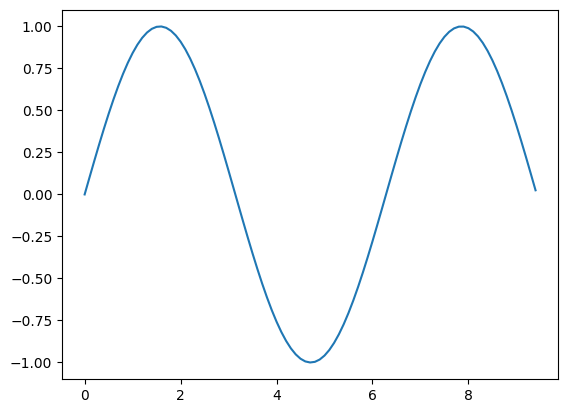

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

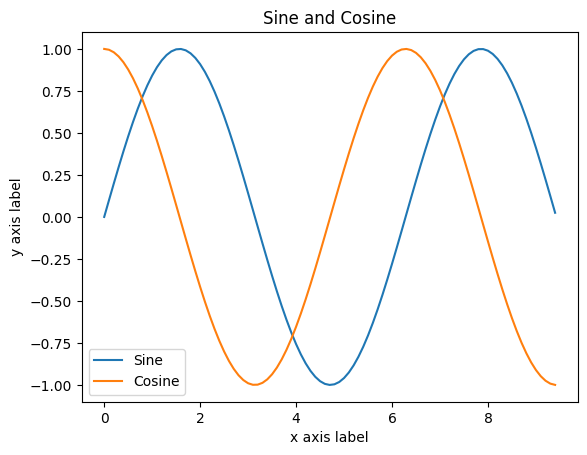

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

###Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

In [ ]:
# prompt: receive input from user and calculate the VAT with 7%

def calculate_vat():
  """
  Receives input from the user and calculates VAT with 7%.
  """
  try:
    price = float(input("Enter the price: "))
    vat_rate = 0.07
    vat_amount = price * vat_rate
    total_price = price + vat_amount
    print(f"Price: {price:.2f}")
    print(f"VAT (7%): {vat_amount:.2f}")
    print(f"Total price: {total_price:.2f}")
  except ValueError:
    print("Invalid input. Please enter a number.")

calculate_vat()


Enter the price: 100
Price: 100.00
VAT (7%): 7.00
Total price: 107.00


You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

**ทดลองสร้าง Linear Regression เบื้องต้น**

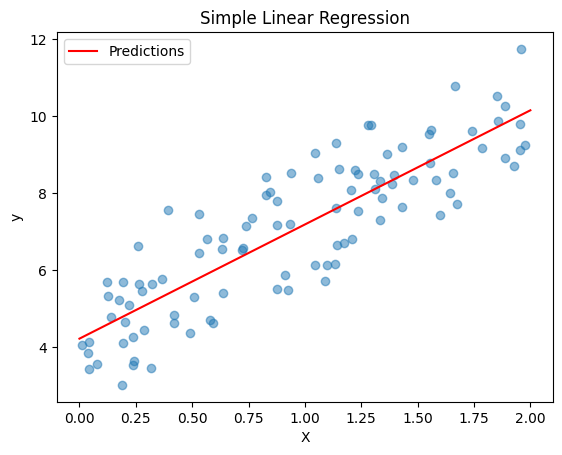

In [ ]:
# prompt: linear regression
# ตัวกระตุ้น: การถดถอยเชิงเส้น (Linear Regression)

# Simple Linear Regression Example
# ตัวอย่างการถดถอยเชิงเส้นแบบง่าย

# Generate some random data for demonstration
# สร้างข้อมูลสุ่มบางส่วนสำหรับการสาธิต

np.random.seed(0)    # for reproducibility
                    # ตั้งค่า seed เพื่อให้สุ่มได้เหมือนเดิมทุกครั้ง (ทำให้สามารถทำซ้ำผลลัพธ์ได้)

X = 2 * np.random.rand(100, 1)  # 100 data points, 1 feature
                                # สร้างข้อมูล X ขนาด 100 แถว 1 คอลัมน์ มีค่าตั้งแต่ 0 ถึง 2

y = 4 + 3 * X + np.random.randn(100, 1)
# สร้างข้อมูลเป้าหมาย y ตามสมการ y = 4 + 3X + noise (ค่ารบกวน)

# Add a bias term (intercept) to the feature matrix X
# เพิ่มตัวออฟเซต (bias term) หรือค่าแกนตัด (intercept) เข้าไปใน X

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
# ผนวกคอลัมน์ของค่า 1 เข้าไปด้านซ้ายของ X เพื่อแทน x₀ = 1

# Calculate the optimal parameters using the Normal Equation
# คำนวณพารามิเตอร์ที่ดีที่สุดด้วยสมการปกติ (Normal Equation)

# theta_best = (X_b.T * X_b)^(-1) * X_b.T * y
# สูตรการหาค่าพารามิเตอร์ theta: theta = (XᵀX)⁻¹ Xᵀ y

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# คำนวณค่าของ theta_best ตามสูตร Normal Equation

# Make predictions using the calculated parameters
# ทำนายค่าผลลัพธ์ด้วยพารามิเตอร์ที่ได้

X_new = np.array([[0], [2]])  # New data points to predict
# ข้อมูลใหม่ 2 จุดที่เราต้องการทำนายผลลัพธ์

X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
# เพิ่มค่า x₀ = 1 เข้าไปเหมือนตอนสร้าง X_b

y_predict = X_new_b.dot(theta_best)
# ทำนายค่า y โดยใช้พารามิเตอร์ที่ได้

# Plot the data and the linear regression line
# วาดกราฟข้อมูลและเส้นถดถอยเชิงเส้น

plt.scatter(X, y, alpha=0.5)  # แสดงจุดข้อมูลจริงแบบกระจาย
plt.plot(X_new, y_predict, "r-", label="Predictions")  # วาดเส้นถดถอย

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Simple Linear Regression")
plt.show()